<a href="https://colab.research.google.com/github/genaiconference/AgenticAI_GenAIHack/blob/main/02_LangGraph_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contents**

* Node
* Edge
* Stream
* Build Simple Graph using LangGraph
* Example: Sentiment Analysis
* State
* Example: Sentiment Analysis with Graph State
* Conditional Edge
* Example: Analyze the review further if the sentiment is Negative/Mixed
* Branching
* Example: Demo code to see the power of branching


In [1]:
# @title
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [2]:
# @title
from google.colab.output import eval_js
eval_js('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})')


In [3]:
!pip install -q langchain==0.2.9 langchain-openai==0.1.7 langgraph==0.0.55 tavily-python==0.3.5 python_dotenv==1.0.1 simple-colors==0.1.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.7/987.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.9/335.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00


## Import required libraries

## Define LLM

In [22]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv(dotenv_path="/content/.env")

llm  = ChatOpenAI(model="gpt-4o")

In [7]:
llm.invoke("Haiku about AI conference")

AIMessage(content='Bright minds gather here,  \nWhispers of code and data,  \nFuture sparks ignite.', response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 12, 'total_tokens': 30}, 'model_name': 'gpt-4o-mini', 'system_fingerprint': 'fp_9b0abffe81', 'finish_reason': 'stop', 'logprobs': None}, id='run-0b99f8af-a093-4831-80a6-5f078a1819fa-0')

# **Now Let's understand the step by step creation of a Graph**

## Let's start building a simple Graph
Two Nodes connected using an Edge


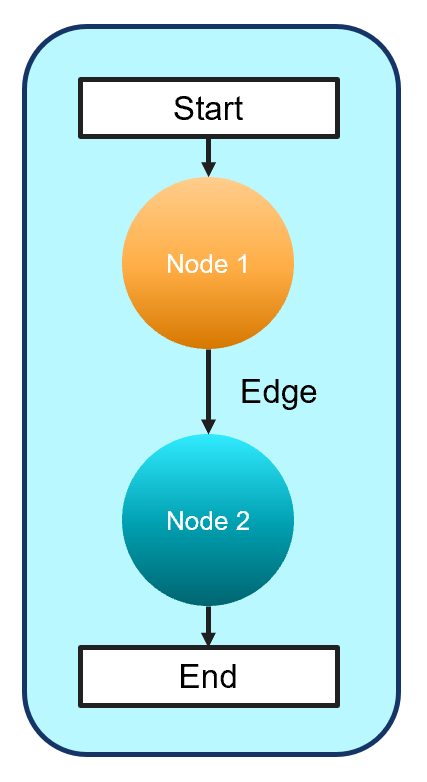

Step 1: Define two functions

In [8]:
def func_1(input_1):
    return input_1 + " First Function"

def func_2(input_2):
    return input_2 + " to Second Function"

Step 2: Define Graph and add functions as Nodes

In [10]:
from langgraph.graph import Graph

# Define a graph
workflow = Graph()

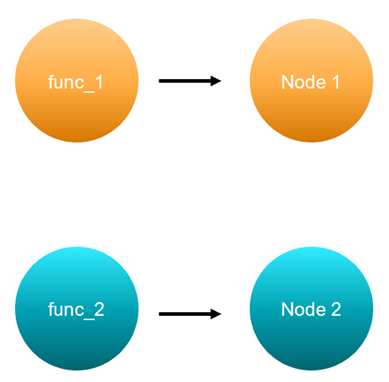

In [11]:
# Add nodes to the graph
workflow.add_node("node_1",func_1)
workflow.add_node("node_2",func_2)

Step 3: Define a work flow and compile the Graph

In [12]:
#Set Entry and Exit points
workflow.set_entry_point("node_1")

# Time to add edge
workflow.add_edge("node_1", "node_2")

workflow.set_finish_point("node_2")

graph = workflow.compile()

# **Now your Graph is Ready!!**

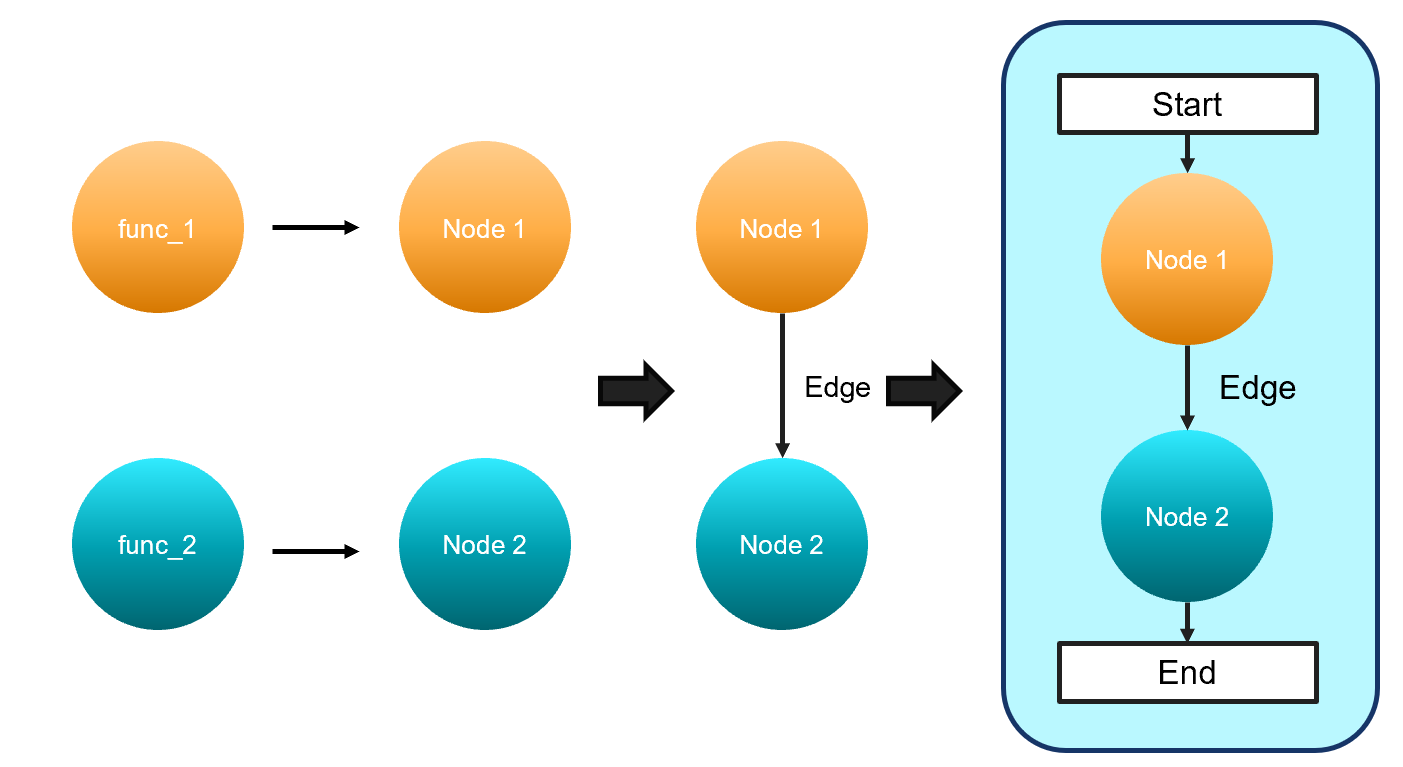

**Question**: Can I visualize the Graph I build?

**Answer**: YES!

Now Let's Visualize the Graph

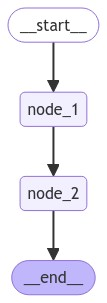

In [13]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

Now Let's run the Graph

In [14]:
graph.invoke("I move from")

'I move from First Function to Second Function'

**Question**: Can I experience the happenings in the Graph as it executes?

**Answer**: Yes, using the concept called **Streaming**

# **Streaming output from LangGraph**

stream() method outputs dictionary of the format

```
{node_name : output_from_the_node}
```



Lets travel through the Graph

In [15]:
graph_input = 'I am moving from'
for output in graph.stream(graph_input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from '{key}':")
        print(value)

    print("---\n")

Output from 'node_1':
I am moving from First Function
---

Output from 'node_2':
I am moving from First Function to Second Function
---



Let's formalize a typical Graph building

# **Step-by-Step building of a Graph**

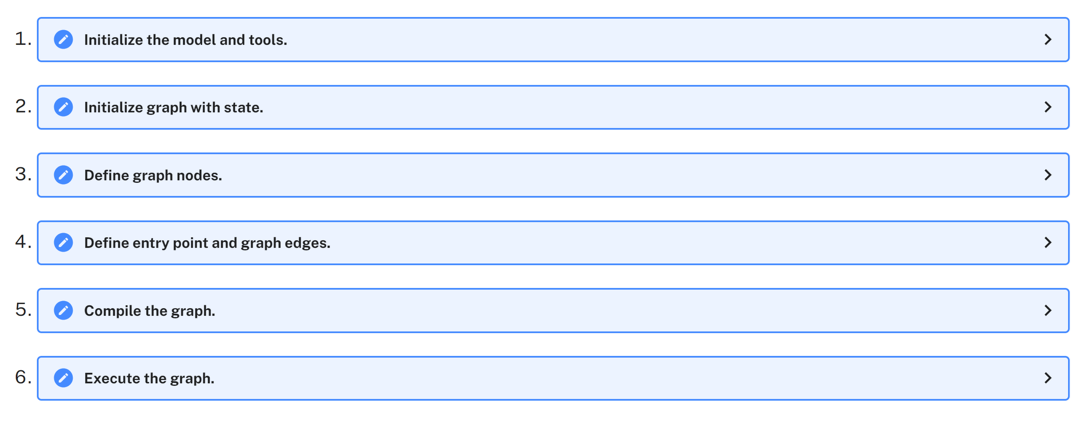

# **Now Let's build something Intersting using LangGraph**

## Sentiment Analysis using LangGraph

Define functions for Nodes

In [23]:
def sentiment_analysis(input_1):
    SA_prompt = f"""You are an expert at performing sentiment analysis.
    Your task is identify the sentiment of the provided input.
    Provide only the sentiment based on the user input.
    Don't include reasoning.

    User input: {input_1}"""

    response = llm.invoke(SA_prompt)
    return response.content

def convert_to_upper(input_2):
    Sentiment_UPPER = input_2.upper()
    response = f"Here is the SENTIMENT in UPPER case: {Sentiment_UPPER}"
    return response

Construct the Graph Workflow

In [18]:
# Define a Langchain graph
workflow = Graph()

workflow.add_node("sentiment_analysis", sentiment_analysis)
workflow.add_node("convert_to_upper", convert_to_upper)

workflow.set_entry_point("sentiment_analysis")

workflow.add_edge('sentiment_analysis', 'convert_to_upper')

workflow.set_finish_point("convert_to_upper")

app = workflow.compile()

### Visulize the Graph

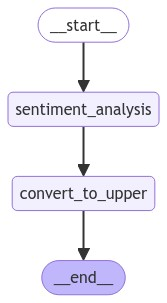

In [19]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

Now Let's run the Graph to identify the sentiments of Tweets

In [20]:
tweet = "The movie was so nice that I walked out in 2 min"
app.invoke(tweet)

'Here is the SENTIMENT in UPPER case: NEGATIVE'

In [24]:
tweet = "Wish the movie was nice. But it was extraordinary"
app.invoke(tweet)

'Here is the SENTIMENT in UPPER case: POSITIVE'

Let's experience the step by step happenings as the Graph executes

In [25]:
for output in app.stream(tweet):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("---\n")

Output from node 'sentiment_analysis':
---
Positive
---

Output from node 'convert_to_upper':
---
Here is the SENTIMENT in UPPER case: POSITIVE
---



**Question**: This is Interesting! But I want to save the intermediate results of nodes in a centralized repository to access it all over the Graph. Is it possible?

**Answer**: Yes, this is possible using **State**

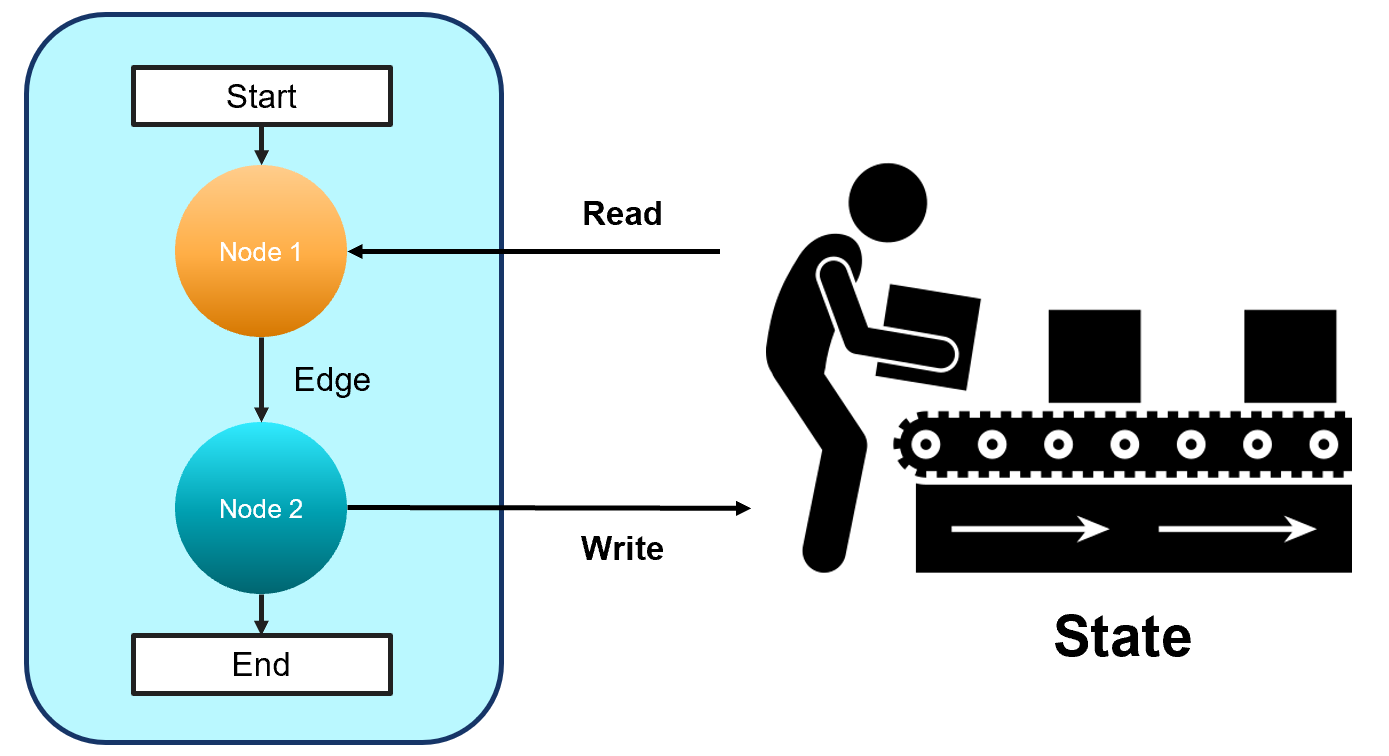

# **State**

One of the central concepts of LangGraph is state. Each graph execution creates a state that is passed between nodes in the graph as they execute, and each node updates this internal state with its return value after it executes.


### Benefits

-Enables stateful applications that can maintain context over multiple interactions

-Allows for coordination between multiple agents or components

-Facilitates error handling and recovery via checkpointing

-Simplifies the development of complex workflows


Now let's introduce "state" to the above Graph.

**Define Graph State**

In [32]:
from typing_extensions import TypedDict

class State(TypedDict):
    user_review: str
    sentiment_label: str
    sentiment_label_in_upper: str

State, in here is defined as a class containing a bunch of key value value pairs

In [33]:
from IPython.display import Markdown

def sentiment_analysis(state):
    print("------ENTERING: SENTIMENT ANALYSIS NODE------")
    print(f"State: {state}")
    SA_prompt = f"""You are an expert at performing sentiment analysis.
    Your task is identify the sentiment of the provided input.
    Provide only the sentiment based on the user input.
    Don't include reasoning.

    User input: {state['user_review']}"""

    response = llm.invoke(SA_prompt)

    return {"sentiment_label": response.content}


def convert_to_upper(state):
    print("------ENTERING: CONVERT_TO_UPPER NODE------")
    display(Markdown("**State**"))
    print(f"State: {state}")
    Sentiment_UPPER = state['sentiment_label'].upper()
    return {"sentiment_label_in_upper": Sentiment_UPPER}

In [34]:
# Define a graph
from langgraph.graph import StateGraph

workflow = StateGraph(State)

workflow.add_node("sentiment_analysis", sentiment_analysis)
workflow.add_node("convert_to_upper", convert_to_upper)

workflow.set_entry_point("sentiment_analysis")

workflow.add_edge('sentiment_analysis', 'convert_to_upper')

workflow.set_finish_point("convert_to_upper")

app = workflow.compile()

### Visualize the Graph

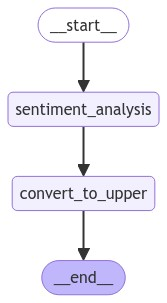

In [35]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [36]:
from simple_colors import *

review = "The movie was so nice that I walked out in 2 min"
input_review = {"user_review": review}

# Run the graph until the first interruption
for output in app.stream(input_review, stream_mode="values"):
    print(cyan(output, ['bold']))

{'user_review': 'The movie was so nice that I walked out in 2 min'}
------ENTERING: SENTIMENT ANALYSIS NODE------
State: {'user_review': 'The movie was so nice that I walked out in 2 min', 'sentiment_label': None, 'sentiment_label_in_upper': None}
{'user_review': 'The movie was so nice that I walked out in 2 min', 'sentiment_label': 'Negative'}
------ENTERING: CONVERT_TO_UPPER NODE------


**State**

State: {'user_review': 'The movie was so nice that I walked out in 2 min', 'sentiment_label': 'Negative', 'sentiment_label_in_upper': None}
{'user_review': 'The movie was so nice that I walked out in 2 min', 'sentiment_label': 'Negative', 'sentiment_label_in_upper': 'NEGATIVE'}


In [37]:
from simple_colors import *

review = "Wish the movie was nice. But it was extraordinary"
input_review = {"user_review": review}

# Run the graph until the first interruption
for output in app.stream(input_review, stream_mode="values"):
    print(cyan(output, ['bold']))

{'user_review': 'Wish the movie was nice. But it was extraordinary'}
------ENTERING: SENTIMENT ANALYSIS NODE------
State: {'user_review': 'Wish the movie was nice. But it was extraordinary', 'sentiment_label': None, 'sentiment_label_in_upper': None}
{'user_review': 'Wish the movie was nice. But it was extraordinary', 'sentiment_label': 'Positive'}
------ENTERING: CONVERT_TO_UPPER NODE------


**State**

State: {'user_review': 'Wish the movie was nice. But it was extraordinary', 'sentiment_label': 'Positive', 'sentiment_label_in_upper': None}
{'user_review': 'Wish the movie was nice. But it was extraordinary', 'sentiment_label': 'Positive', 'sentiment_label_in_upper': 'POSITIVE'}


**Question**: Wow! I am loving this already. But is there a way I can check a condition to decide if I will have to take a path A or B?

**Answer**: Yes, we can achieve this using **Conditional Edge**

## Conditional Edge

**Use Case**: Now I want my graph to further analyze the movie review and report what did not work for the user only if the sentiment is Negative/Mixed.

Let's Build the workflow for the above use case.

Define functions for Nodes

In [39]:
import functools, operator
from typing import Annotated
from IPython.display import Markdown
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


# Notice that we have added "feedback_analysis" as an extra item
class State(TypedDict):
    user_review: str
    sentiment_label: str
    feedback_analysis: str
    overall_status: Annotated[str, operator.add]

def sentiment_analysis(state):
    print("------ENTERING: SENTIMENT ANALYSIS NODE------")
    print(state)
    SA_prompt = f"""You are an expert at performing sentiment analysis.
    Your task is identify the sentiment of the provided input.
    Provide only the sentiment based on the user input.
    Don't include reasoning.

    User input: {state['user_review']}"""

    response = llm.invoke(SA_prompt)

    print("--------")
    print(red(f"Sentiment Identified: [{response.content}]", ['bold']))
    print("--------")

    return {"sentiment_label": response.content}



def user_review_analysis(state):
    """
    Analyzes the user review and gives top reasons of what did not work for the user.
    """
    print("------ENTERING: USER REVIEW ANALYSIS NODE------")
    print(state)
    feedback_analysis_prompt = f"""You are an expert at performing analysis on the user review. The review can be about a movie or a product.
    Your task is to carefully analyze the user review and give top reasons of what did not work for the user.
    Make the answer readable.
    Note: Provide your analysis only using the user review and justify the sentiment

    User review: {state['user_review']}
    Sentiment Identified: {state['sentiment_label']}"""

    response = llm.invoke(feedback_analysis_prompt)

    display(Markdown(response.content))

    return {"feedback_analysis": response.content}

Define Graph and add Nodes

In [40]:
# Define a graph
workflow = StateGraph(State)

workflow.add_node("sentiment_analysis", sentiment_analysis)
workflow.add_node("user_review_analysis", user_review_analysis)

Define the workflow

In [41]:
workflow.set_entry_point("sentiment_analysis")

def where_to_go(state):
    if state["sentiment_label"].lower() == "positive":
        return END
    else:
        return "user_review_analysis"

workflow.add_conditional_edges("sentiment_analysis", where_to_go, ["user_review_analysis", END])

workflow.add_edge('user_review_analysis', END)

app = workflow.compile()

Let's visualize the Graph

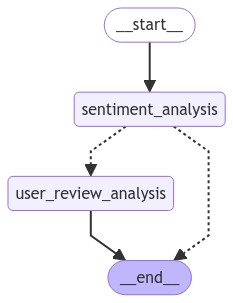

In [42]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [43]:
from simple_colors import *

review = """The movie was nice that I walked out of the hall in 1 min. Then came back within 5 min and then slept off. Woke up and saw back 2 back shows. enjoyed with pain"""

user_input = {"user_review": review}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for output in app.stream(user_input, thread, stream_mode="values"):
    # print(cyan(output, ['bold']))
    pass

------ENTERING: SENTIMENT ANALYSIS NODE------
{'user_review': 'The movie was nice that I walked out of the hall in 1 min. Then came back within 5 min and then slept off. Woke up and saw back 2 back shows. enjoyed with pain', 'sentiment_label': None, 'feedback_analysis': None, 'overall_status': ''}
--------
Sentiment Identified: [Mixed]
--------
------ENTERING: USER REVIEW ANALYSIS NODE------
{'user_review': 'The movie was nice that I walked out of the hall in 1 min. Then came back within 5 min and then slept off. Woke up and saw back 2 back shows. enjoyed with pain', 'sentiment_label': 'Mixed', 'feedback_analysis': None, 'overall_status': ''}


Based on the user review provided, here is the detailed analysis with the top reasons of what did not work for the user:

1. **Initial Disinterest**:
    - The user mentions walking out of the hall within the first minute. This indicates that the beginning of the movie failed to capture their interest or attention. The start of the movie might not have been engaging or compelling enough to keep the viewer invested.

2. **Inconsistent Engagement**:
    - The user returned to the hall within five minutes, which suggests a momentary curiosity or hope that things might improve. However, their subsequent action of falling asleep indicates that the movie failed to maintain their interest consistently.

3. **Physical Discomfort**:
    - The phrase "enjoyed with pain" suggests that while there were moments of enjoyment, they were overshadowed by an overall sense of discomfort or dissatisfaction. This could be due to the movie's pacing, storyline, or other elements that made the experience less enjoyable.

4. **Sleep as an Escape**:
    - Falling asleep during the movie is a strong indicator of boredom or lack of engagement. It implies that the movie was not captivating enough to keep the viewer awake and attentive.

5. **Back-to-Back Shows**:
    - The user mentions watching back-to-back shows, which could imply either repeated viewings of the same movie or watching different movies consecutively. If it’s the former, it suggests a complex relationship with the movie where the user found some value in repeated viewing despite initial disengagement. If it's the latter, it highlights the initial movie's failure to satisfy, leading the user to seek better entertainment elsewhere.

### Justification of Sentiment:
The sentiment is identified as mixed because the user had conflicting experiences:
- **Positive Aspects**: 
    - The user mentions enjoying parts of the experience, suggesting that there were elements of the movie that they found appealing or entertaining.
- **Negative Aspects**: 
    - The initial disinterest, subsequent sleep, and the mention of "pain" highlight significant issues that outweighed the positive aspects and contributed to an overall sense of dissatisfaction.

Overall, the review reflects a struggle between moments of enjoyment and significant dissatisfaction, leading to a mixed sentiment.

In [45]:
from simple_colors import *

review = """To be portrayed as the biggest Indian spectacle till date is a heavy accolade to hold, let alone achieve. And baahubali is definitely not up to the mark.

Let's look at the movie objectively:

1) Starting with the most talked about aspect of the movie VFX/CGI. The CGI is so over the top that it felt like a badly edited video game at times. For instance, the scene in which Baahubali is running away from the guards in the fort.

Loud and showy landscapes can not be termed as spectacular CGI. It should merge seamlessly with the movie and CGI stands out like a sore thumb in this one.

2)Acting: Its loud and crass to say the least. The reactions of all characters after every dialogue reminds a bit of the daily soaps.

3)StoryLine: Its old and repetitive from a 1000 other movies of the same genre. A messiah who comes to save the day. Yes, that's never been done before in Indian cinema.

However, despite all the above points Baahubali puts in a valiant effort. But to compare it to the likes of Lord of the Rings and Hobbit with the sheer depth of Tolkien's work is sacrilege. No where near that league.

Only recommended for the faithful.
"""

user_input = {"user_review": review}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for output in app.stream(user_input, thread, stream_mode="values"):
    # print(cyan(output, ['bold']))
    pass

------ENTERING: SENTIMENT ANALYSIS NODE------
{'user_review': "To be portrayed as the biggest Indian spectacle till date is a heavy accolade to hold, let alone achieve. And baahubali is definitely not up to the mark.\n\nLet's look at the movie objectively:\n\n1) Starting with the most talked about aspect of the movie VFX/CGI. The CGI is so over the top that it felt like a badly edited video game at times. For instance, the scene in which Baahubali is running away from the guards in the fort.\n\nLoud and showy landscapes can not be termed as spectacular CGI. It should merge seamlessly with the movie and CGI stands out like a sore thumb in this one.\n\n2)Acting: Its loud and crass to say the least. The reactions of all characters after every dialogue reminds a bit of the daily soaps.\n\n3)StoryLine: Its old and repetitive from a 1000 other movies of the same genre. A messiah who comes to save the day. Yes, that's never been done before in Indian cinema.\n\nHowever, despite all the above 

Based on the user review, here are the top reasons why the movie "Baahubali" did not work for the user, along with justifications for the negative sentiment:

1. **Over-the-Top CGI:**
   - **Issue:** The CGI in the movie felt exaggerated and poorly executed, likened to a "badly edited video game."
   - **Justification:** The user specifically mentions a scene where Baahubali is running away from the guards, pointing out that the CGI did not blend seamlessly with the movie and instead stood out awkwardly.

2. **Loud and Crass Acting:**
   - **Issue:** The acting was described as "loud and crass," with characters' reactions resembling those found in daily soap operas.
   - **Justification:** The user criticizes the over-dramatic reactions of the characters after every dialogue, which detracted from the movie's overall quality.

3. **Repetitive Storyline:**
   - **Issue:** The storyline was deemed old and repetitive, similar to many other movies in the same genre.
   - **Justification:** The user felt that the plot—a messiah coming to save the day—was a cliché that has been overused in Indian cinema, making the movie predictable and unoriginal.

4. **Unfavorable Comparison:**
   - **Issue:** Comparing "Baahubali" to epic works like "Lord of the Rings" and "The Hobbit" was considered "sacrilege" by the user.
   - **Justification:** The user believed that "Baahubali" lacked the depth of Tolkien's works and was not in the same league, further reinforcing their negative sentiment.

Despite these criticisms, the user did acknowledge the movie's effort and suggested it might still be worthwhile for devoted fans. However, the predominant sentiment remains negative due to the significant issues highlighted.

**Question**: This is really Cool! Now I want to run multiple nodes parallelly. Is that possible?

**Answer**: Yes, this can be achieved using **Branching** Concept

# **Branching**

Let's understand how can we run parallel nodes using Branching Concept

In [46]:
import time
import operator
from typing import Annotated, Any
from typing_extensions import TypedDict

from langgraph.graph import StateGraph

class State(TypedDict):
    # The operator.add reducer function adds the value
    sequential_execution_time: Annotated[int, operator.add]


def start_node(state):
    print("------ENTERING: START NODE------")
    return {"sequential_execution_time": 0}

def parallel_node_A(state):
    print("------ENTERING: NODE A------")
    time.sleep(5)
    return {"sequential_execution_time": 5}

def parallel_node_B(state):
    print("------ENTERING: NODE B------")
    time.sleep(5)
    return {"sequential_execution_time": 5}

def parallel_node_C(state):
    print("------ENTERING: NODE C------")
    time.sleep(5)
    return {"sequential_execution_time": 5}

def end_node(state):
    print("------ENTERING: END NODE------")
    return {"sequential_execution_time": 0}

workflow = StateGraph(State)

workflow.add_node("start_node", start_node)
workflow.add_node("parallel_node_A", parallel_node_A)
workflow.add_node("parallel_node_B", parallel_node_B)
workflow.add_node("parallel_node_C", parallel_node_C)
workflow.add_node("end_node", end_node)


workflow.set_entry_point("start_node")

workflow.add_edge('start_node', 'parallel_node_A')
workflow.add_edge('start_node', 'parallel_node_B')
workflow.add_edge('start_node', 'parallel_node_C')

workflow.add_edge('parallel_node_A', 'end_node')
workflow.add_edge('parallel_node_B', 'end_node')
workflow.add_edge('parallel_node_C', 'end_node')

workflow.set_finish_point("end_node")

graph = workflow.compile()

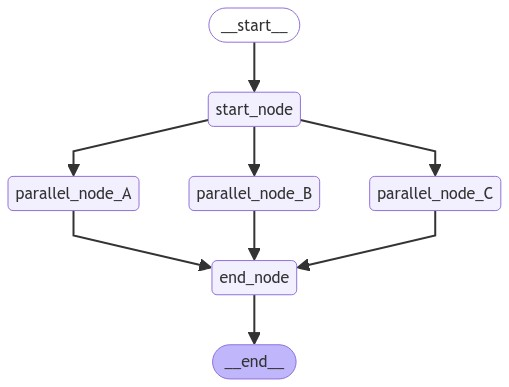

In [47]:

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

Let's see the power of Branching now

In [48]:
inputs = {}
start_time = time.time()

for output in graph.stream(inputs, stream_mode="values"):
    print(cyan(output, ['bold']))
    pass

ex_time = time.time() - start_time

print("--------------------------------------------------------")
print(red(f"Original Time Taken - [{round(ex_time, 2)}]", ['bold']))
print("--------------------------------------------------------")

------ENTERING: START NODE------
{'sequential_execution_time': 0}
------ENTERING: NODE A------
------ENTERING: NODE B------
------ENTERING: NODE C------
{'sequential_execution_time': 15}
------ENTERING: END NODE------
{'sequential_execution_time': 15}
--------------------------------------------------------
Original Time Taken - [5.07]
--------------------------------------------------------
